In [37]:
import sys
sys.path.append('../../dataset/')
from gaussian3d_loader import *

In [41]:
from pathlib import Path
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format='retina'
%matplotlib inline

In [47]:
random_state = 42
normal_mu = [1, - 1, 1]
abnormal_mu = [1, 1, 1]
cov = [[0.1, 0, 0],
       [0, 0.1, 0],
       [0, 0, 0.1]]
split = 0.2
ratio_abnormal = 0.1

In [51]:
# Set random seed
np.random.seed(random_state)

# Generate X_normal
X_normal = np.random.multivariate_normal(normal_mu, cov, 6000)
y_normal = np.zeros(X_normal.shape[0])
        
# Generate X_abnormal
X_abnormal = np.random.multivariate_normal(abnormal_mu, cov, int(6000 * ratio_abnormal))
y_abnormal = np.ones(X_abnormal.shape[0])

# Concatenate
X = np.vstack((X_normal, X_abnormal))
y = np.hstack((y_normal, y_abnormal))

# Do train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=split,
                                                    random_state=random_state,
                                                    stratify=y)

In [52]:
X_train_normal = X_train[y_train == 0]
X_train_abnormal = X_train[y_train == 1]

In [23]:
y_train == 0

array([ True,  True,  True, ...,  True,  True,  True])

In [24]:
X_train.shape

(5280, 3)

In [29]:
X_train[y_train == 0].shape

(4800, 3)

In [ ]:
np.random.seed(42)

In [67]:
import gtk as Gtk

ModuleNotFoundError: No module named 'gtk'

In [65]:
import gi
gi.require_version('Gtk', '3.0')
from gi.repository import Gtk

from matplotlib.figure import Figure
from matplotlib.backends.backend_gtk3agg import FigureCanvas
from matplotlib.backends.backend_gtk3 import (
    NavigationToolbar2GTK3 as NavigationToolbar)

win = Gtk.Window()
win.connect("destroy", lambda x: Gtk.main_quit())
win.set_default_size(400,300)
win.set_title("Embedding in GTK")

ModuleNotFoundError: No module named 'gi'

(-4, 4)

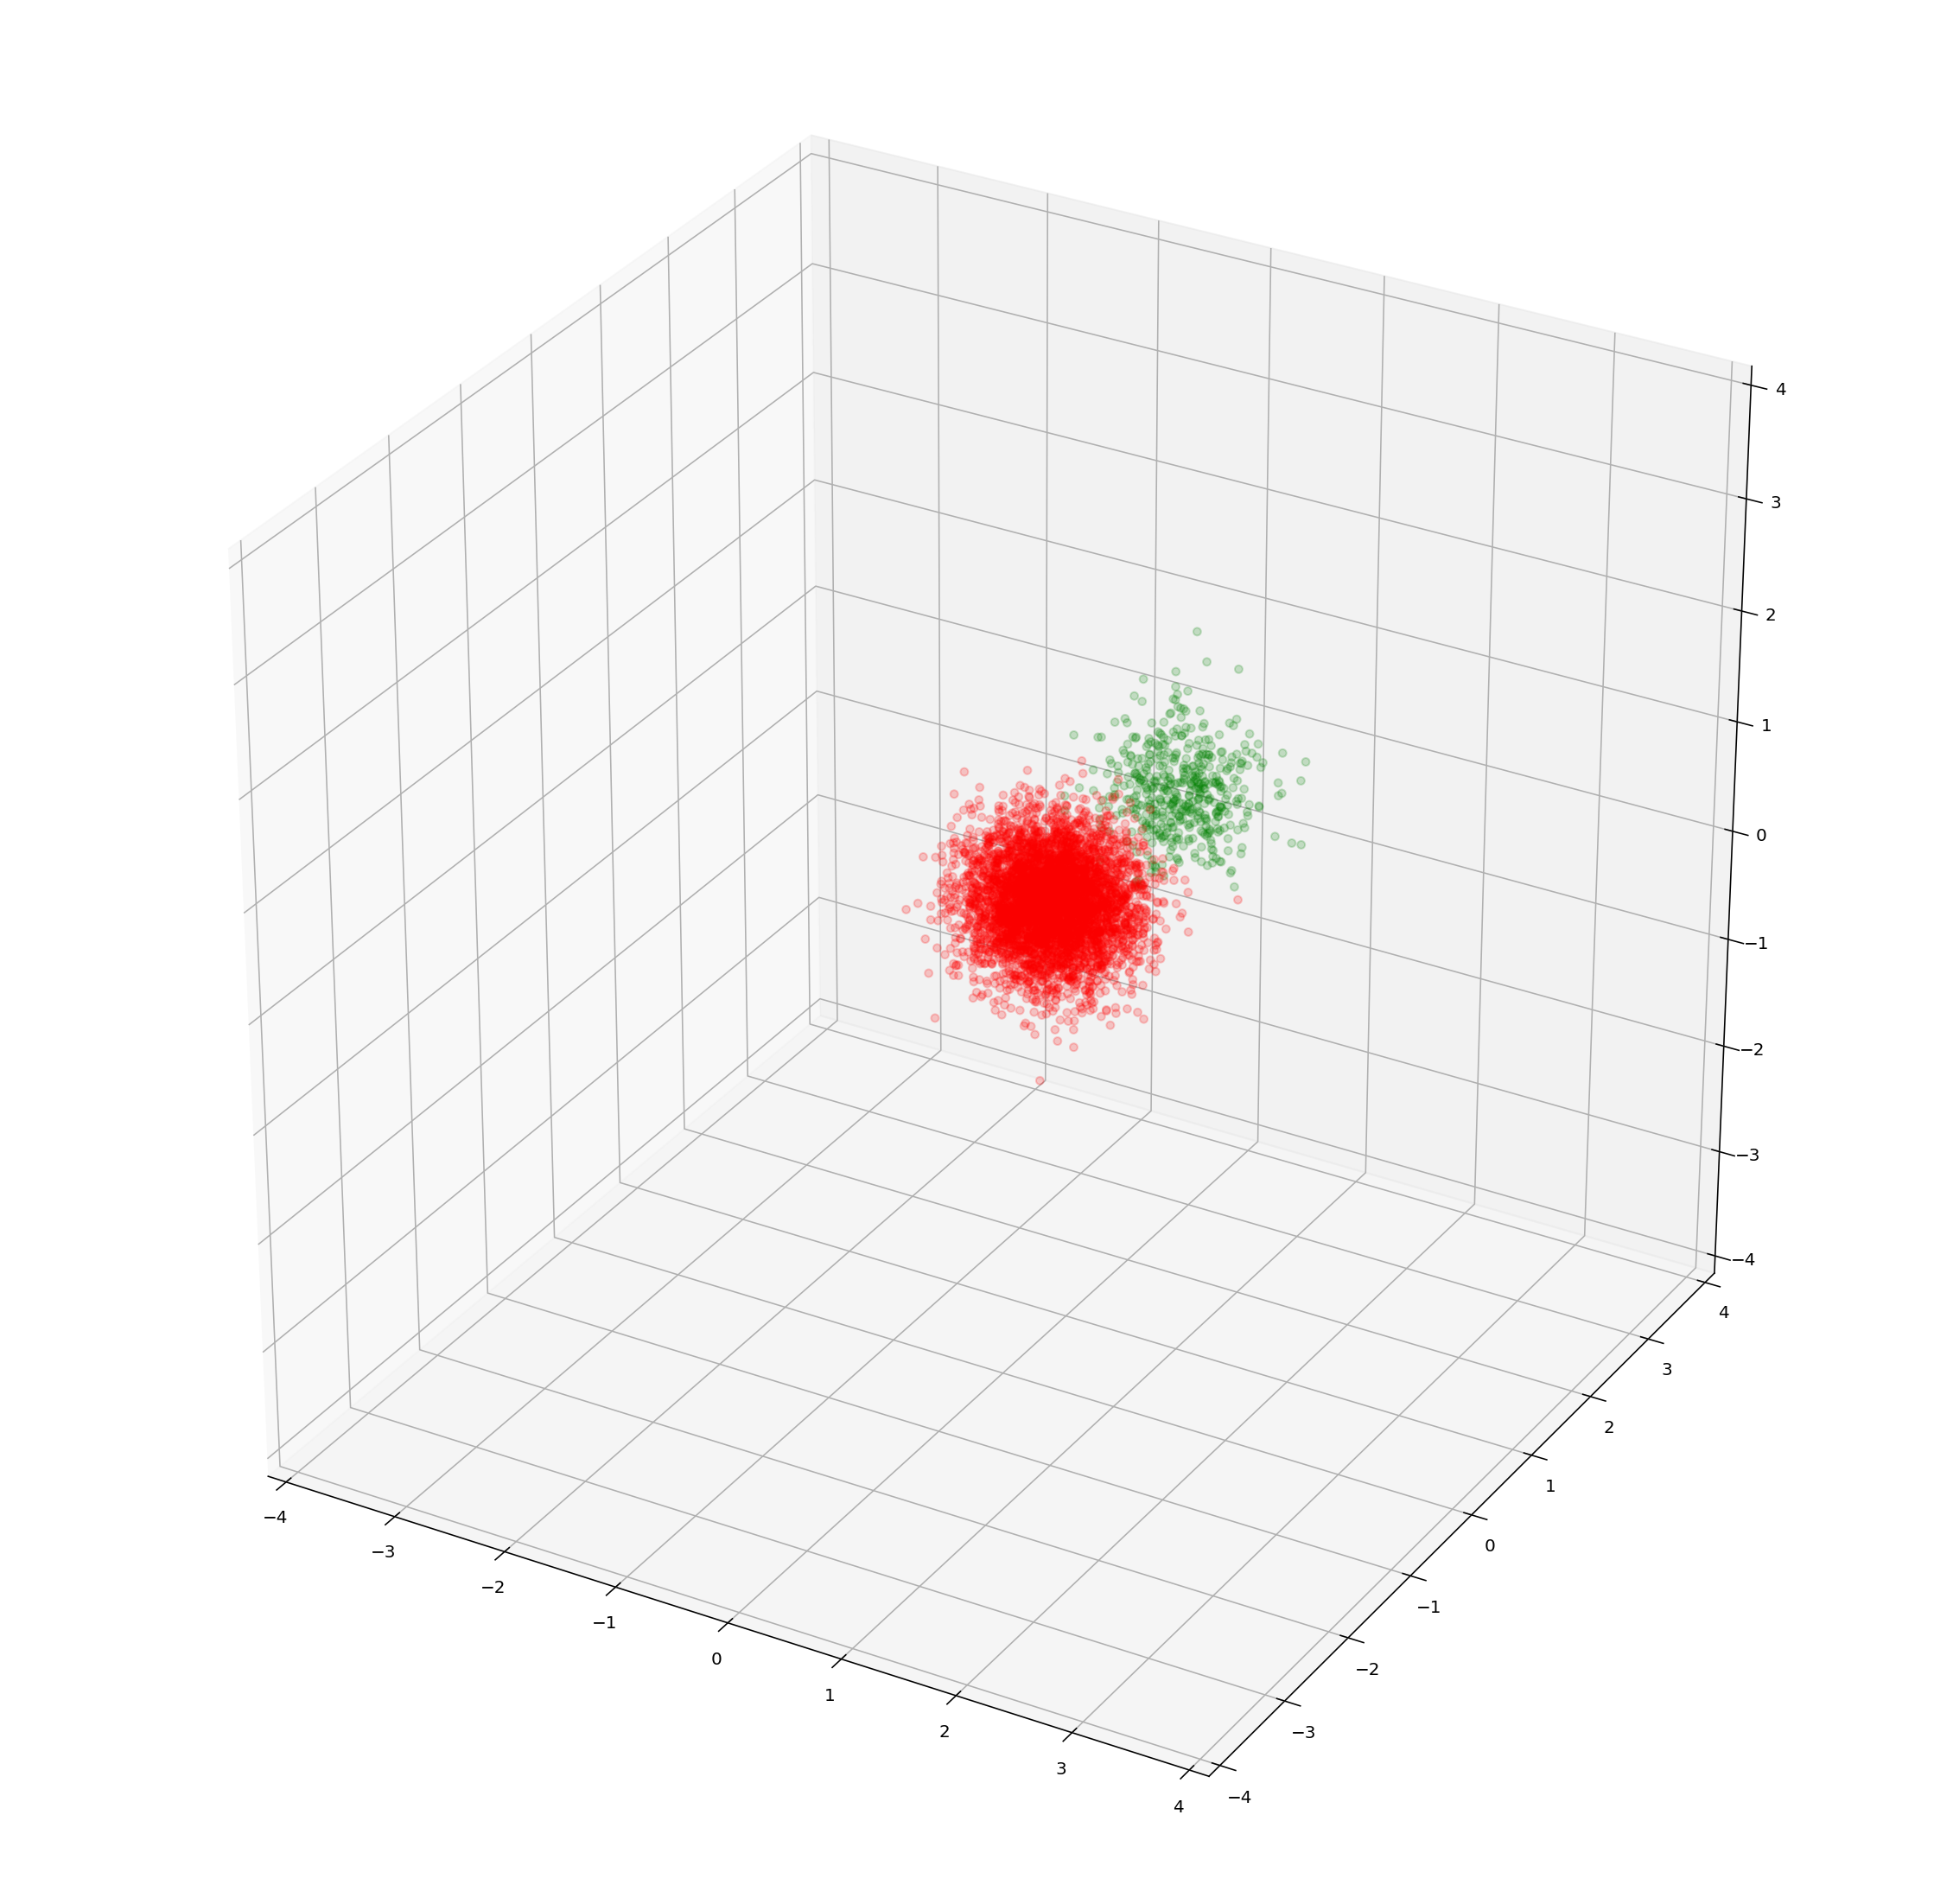

In [64]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(*X_train_normal.T, color='red', alpha=0.2)
ax.scatter(*X_train_abnormal.T, color='green', alpha=0.2)
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)